### Author: Tanvi Bhagat

### AIM: To do exploratory data analysis and implement linear regression.

#### Importing Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [3]:
fleet_data = pd.read_csv("Fleet Data.csv")

In [4]:
fleet_data.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


In [157]:
fleet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
Parent Airline          1583 non-null object
Airline                 1583 non-null object
Aircraft Type           1583 non-null object
Current                 859 non-null float64
Future                  188 non-null float64
Historic                1113 non-null float64
Total                   1484 non-null float64
Orders                  348 non-null float64
Unit Cost               1548 non-null object
Total Cost (Current)    1556 non-null object
Average Age             820 non-null float64
dtypes: float64(6), object(5)
memory usage: 136.2+ KB


In [158]:
fleet_data.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

In [17]:
fleet_data['Aircraft Type'].nunique()

101

### Exploratory Data Analysis

In [101]:
#Airline that has the most orders
fleet_data.groupby(by= 'Airline').sum()['Orders'].sort_values(ascending= False).head(25)

Airline
Lion Air                   425.0
IndiGo                     420.0
AirAsia                    401.0
American Airlines          287.0
Southwest Airlines         284.0
Delta Airlines             268.0
China Eastern Airlines     233.0
Emirates                   231.0
Skywest                    225.0
RyanAir                    205.0
Etihad Airways             190.0
Qatar Airways              187.0
Turkish Airlines           179.0
Lufthansa                  176.0
Air China                  175.0
United Airlines            173.0
easyJet                    165.0
Avianca                    161.0
Aeroflot                   161.0
Wizz Air                   137.0
JetBlue Airways            136.0
Gol Linhas Aéreas          134.0
Korean Air                 133.0
Air Canada                 122.0
China Southern Airlines    115.0
Name: Orders, dtype: float64

In [25]:
aircraftfleet= fleet_data[['Airline', 'Aircraft Type', 'Current', 'Future', 'Historic', 'Total', 'Orders', 'Total Cost (Current)']].copy()

In [26]:
parentfleet= fleet_data[['Parent Airline', 'Aircraft Type', 'Current', 'Future', 'Historic','Total', 'Orders', 'Total Cost (Current)']].copy()

In [27]:
parentfleet.head(6)

,Parent Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Total Cost (Current)
0,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90
1,Aegean Airlines,Airbus A319,NaN,NaN,8.0,8.0,NaN,$0
2,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,"$3,724"
3,Aegean Airlines,Airbus A320,NaN,NaN,9.0,9.0,NaN,$0
4,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$919
5,Aegean Airlines,ATR 42/72,2.0,NaN,NaN,2.0,NaN,$44


In [28]:
aircraftfleet.head(6)

,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Total Cost (Current)
0,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90
1,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$0
2,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,"$3,724"
3,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$0
4,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$919
5,Olympic Air,ATR 42/72,2.0,NaN,NaN,2.0,NaN,$44


In [32]:
# Top 25 Airlines with the biggest currently active aircraft fleet
aircraftfleet.groupby(by= 'Airline').sum()['Current'].sort_values(ascending= False).head(25)

Airline
American Airlines          928.0
Delta Airlines             855.0
United Airlines            730.0
Southwest Airlines         718.0
China Southern Airlines    522.0
China Eastern Airlines     451.0
FedEx Express              408.0
Air China                  375.0
RyanAir                    366.0
American Eagle             297.0
Turkish Airlines           295.0
FedEx Feeder Fleet         288.0
British Airways            268.0
Lufthansa                  267.0
Emirates                   249.0
UPS                        236.0
easyJet                    234.0
Air France                 226.0
JetBlue Airways            225.0
All Nippon Airways         215.0
Skywest                    209.0
Aeroflot                   189.0
Saudi Arabian Airlines     177.0
Alaska Airlines            173.0
Shenzhen Airlines          171.0
Name: Current, dtype: float64

In [82]:
# Top25 Parent Airlines with the biggest currently active aircraft fleet:

parentfleet.groupby(by= 'Parent Airline').sum()['Current'].sort_values(ascending= False).head(25)

Parent Airline
American Airlines          1410.0
Delta Airlines              989.0
Lufthansa                   737.0
United Airlines             730.0
Southwest Airlines          718.0
Air China                   708.0
FedEx Express               696.0
IAG                         608.0
China Eastern Airlines      579.0
Air France/KLM              541.0
China Southern Airlines     522.0
Qantas Airways              367.0
Ryanair                     366.0
LATAM Airlines Chile        347.0
Turkish Airlines            329.0
Hainan Airlines             294.0
Aeroflot                    282.0
Lion Air                    270.0
All Nippon Airways          264.0
easyJet                     260.0
Emirates                    249.0
Avianca                     243.0
UPS Airlines                236.0
JetBlue                     225.0
Alaska Airlines             225.0
Name: Current, dtype: float64

In [35]:
fleet_data[(fleet_data['Parent Airline'] == 'Air Canada') | (fleet_data['Parent Airline'] == 'American Airlines') | (fleet_data['Parent Airline'] == 'Lufthansa') | (fleet_data['Parent Airline'] == 'Emirates') | (fleet_data['Parent Airline'] == 'Qantas Airways') | (fleet_data['Parent Airline'] == 'Singapore Airlines') | (fleet_data['Parent Airline'] == 'United Airlines') ].groupby(by='Parent Airline').sum()['Current'].sort_values(ascending=False).head(10)

Parent Airline
American Airlines     1410.0
Lufthansa              737.0
United Airlines        730.0
Qantas Airways         367.0
Emirates               249.0
Air Canada             214.0
Singapore Airlines     147.0
Name: Current, dtype: float64

In [36]:
selected_airlines = fleet_data[(fleet_data['Parent Airline'] == 'Air Canada') | (fleet_data['Parent Airline'] == 'Emirates') | (fleet_data['Parent Airline'] == 'Lufthansa') | (fleet_data['Parent Airline'] == 'Singapore Airlines') | (fleet_data['Parent Airline'] == 'American Airlines') | (fleet_data['Parent Airline'] == 'Qantas Airways') | (fleet_data['Parent Airline'] == 'United Airlines' )].copy()

In [38]:
# Top10 oldest currently active aircraft types based on the average age
selected_airlines[['Parent Airline', 'Aircraft Type','Average Age']].dropna(axis=0).sort_values(by='Average Age', ascending=False).head(10)

,Parent Airline,Aircraft Type,Average Age
1202,Qantas Airways,British Aerospace BAe 146/Avro RJ,28.7
378,American Airlines,De Havilland Canada DHC-8 Dash 8,26.1
111,Air Canada,Boeing 767,25.8
1005,Lufthansa,Airbus A320,25.4
1208,Qantas Airways,Fokker F70 / F100,23.6
1209,Qantas Airways,Fokker F70 / F100,23.6
101,Air Canada,Airbus A320,23.3
1077,Lufthansa,Fokker F70 / F100,23.2
389,American Airlines,McDonnell Douglas MD-80,22.2
1504,United Airlines,Boeing 747,21.2


In [39]:
 #Top10 newest currently active planes:
selected_airlines[['Parent Airline', 'Aircraft Type','Average Age']].dropna(axis=0).sort_values(by='Average Age').head(10)

,Parent Airline,Aircraft Type,Average Age
1047,Lufthansa,Bombardier BD-500 CSeries,0.3
1330,Singapore Airlines,Airbus A350 XWB,0.4
383,American Airlines,Embraer ERJ-170,0.6
1045,Lufthansa,Boeing 777,0.7
1004,Lufthansa,Airbus A320,0.7
104,Air Canada,Airbus A321,1.0
371,American Airlines,Boeing 787 Dreamliner,1.2
1003,Lufthansa,Airbus A320,1.3
114,Air Canada,Boeing 787 Dreamliner,1.4
377,American Airlines,Canadair CRJ-900,1.5


In [41]:
selected_airlines.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

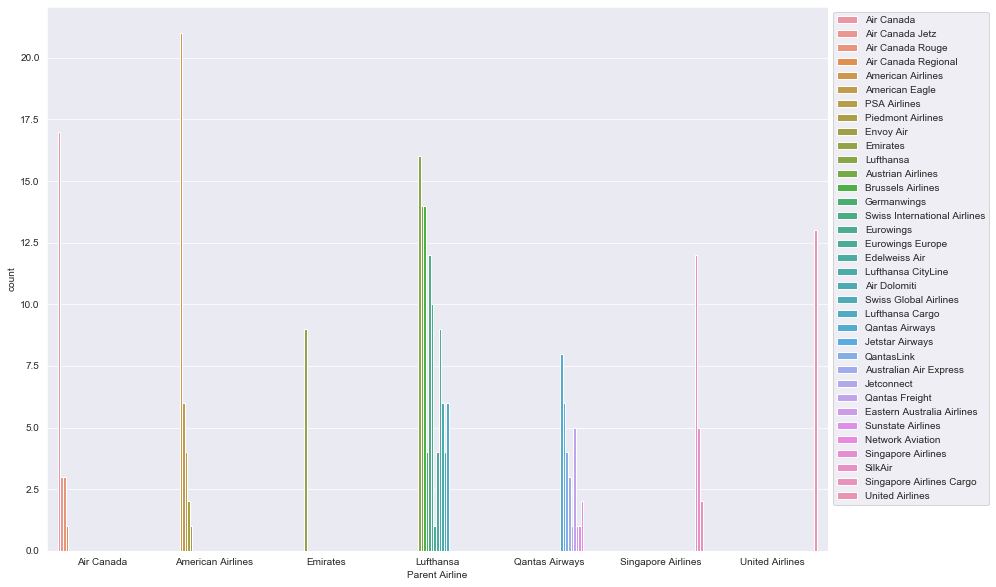

In [103]:
#plot demonstrates the distribution of the aircraft types among daughter airlines. We can see which airline has the biggest variety of the planes.
plt.figure(figsize=(14,10))
sns.countplot(data=selected_airlines, x='Parent Airline', hue='Airline')
plt.legend(bbox_to_anchor=(1, 1.0))

In [49]:
# Number of unique aircraft types
selected_airlines['Aircraft Type'].nunique()

47

In [53]:
# finding the number of unique aircraft types used by Lufthansa:
selected_airlines[selected_airlines['Parent Airline'] == 'Lufthansa']['Aircraft Type'].nunique()

37

In [54]:
selected_airlines[selected_airlines['Parent Airline'] == 'Lufthansa'][['Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders']]

,Aircraft Type,Current,Future,Historic,Total,Orders
990,Airbus A300,NaN,NaN,26.0,26.0,NaN
991,Airbus A310,NaN,NaN,25.0,25.0,NaN
992,Airbus A310,NaN,NaN,4.0,4.0,NaN
993,Airbus A319,30.0,NaN,5.0,35.0,NaN
994,Airbus A319,7.0,NaN,NaN,7.0,NaN
...,...,...,...,...,...,...
1085,McDonnell Douglas MD-80,NaN,NaN,29.0,29.0,NaN
1086,McDonnell Douglas MD-80,NaN,NaN,4.0,4.0,NaN
1087,McDonnell Douglas MD-80,NaN,NaN,11.0,11.0,NaN
1088,McDonnell Douglas MD-80,NaN,NaN,3.0,3.0,NaN


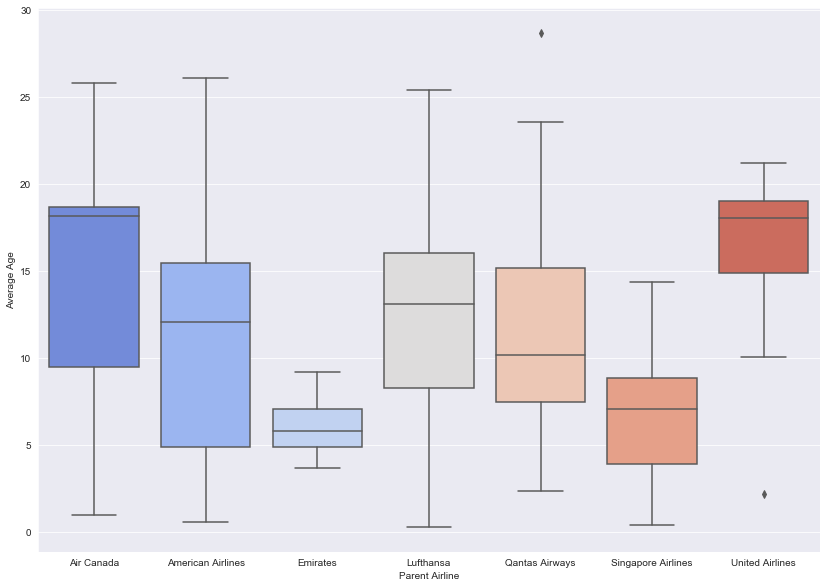

In [102]:
#Average age of aircraft across selected Parent Airlines
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
sns.boxplot(data=selected_airlines, x='Parent Airline', y='Average Age', palette='coolwarm')

In [57]:
#distribution of the big planes like Airbus A380, Airbus A330, Airbus A340, Boeing 747, Boeing 777, Boeing 787 among these selected airlines.
big_aircrafts = selected_airlines[(selected_airlines['Aircraft Type'] == 'Airbus A380') | (selected_airlines['Aircraft Type'] == 'Airbus A330') | (selected_airlines['Aircraft Type'] == 'Airbus A340') | (selected_airlines['Aircraft Type'] == 'Boeing 747') | (selected_airlines['Aircraft Type'] == 'Boeing 777') | (selected_airlines['Aircraft Type'] == 'Boeing 787 Dreamliner')]

In [58]:
big_aircrafts.head(10)

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
105,Air Canada,Air Canada,Airbus A330,8.0,NaN,NaN,8.0,NaN,$240,"$1,920",16.3
106,Air Canada,Air Canada,Airbus A340,NaN,NaN,15.0,15.0,NaN,$216,$0,NaN
110,Air Canada,Air Canada,Boeing 747,NaN,NaN,15.0,15.0,NaN,$316,$0,NaN
113,Air Canada,Air Canada,Boeing 777,25.0,NaN,NaN,25.0,NaN,$295,"$7,364",7.1
114,Air Canada,Air Canada,Boeing 787 Dreamliner,21.0,3.0,NaN,24.0,16.0,$265,"$5,567",1.4
362,American Airlines,American Airlines,Airbus A330,24.0,NaN,NaN,24.0,NaN,$240,"$5,760",9.3
367,American Airlines,American Airlines,Boeing 747,NaN,NaN,19.0,19.0,NaN,$316,$0,NaN
370,American Airlines,American Airlines,Boeing 777,67.0,NaN,NaN,67.0,NaN,$295,"$19,735",12.1
371,American Airlines,American Airlines,Boeing 787 Dreamliner,20.0,6.0,NaN,26.0,22.0,$265,"$5,302",1.2
610,Emirates,Emirates,Airbus A330,NaN,NaN,29.0,29.0,NaN,$115,$0,NaN


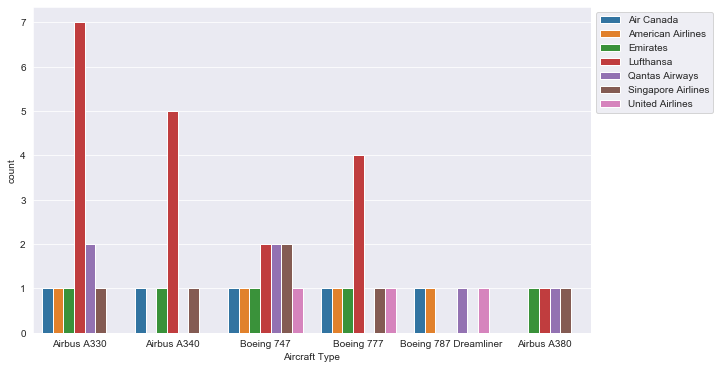

In [60]:
#The plot demonstrates how many Airlines under major daughter airlines use big aircraft.
plt.figure(figsize=(10,6))
sns.countplot(data=big_aircrafts, x='Aircraft Type', hue='Parent Airline')
plt.legend(bbox_to_anchor=(1, 1.0))

In [67]:
selected_airlines.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

In [70]:
bigsorted = big_aircrafts.drop(axis=1, columns='Average Age').groupby('Aircraft Type').sum()
bigsorted.head(10).sort_values('Current', ascending=False)



,Current,Future,Historic,Total,Orders
Aircraft Type,,,,,
Boeing 777,395.0,20.0,49.0,464.0,226.0
Airbus A330,145.0,3.0,76.0,224.0,3.0
Airbus A380,132.0,17.0,0.0,149.0,59.0
Boeing 787 Dreamliner,82.0,11.0,0.0,93.0,67.0
Boeing 747,78.0,0.0,308.0,383.0,0.0
Airbus A340,58.0,2.0,84.0,139.0,3.0


- As we can see the most used type of Aircraft among the selected Airlines is Boeing 777.
- Boeing 787 Dreamliner is quite a new plane and is not that widely used yet.
- Boeing 747 is quite old already and probably most airlines will soone replace these planes with newer ones, like 787.

In [72]:
bigsorted = big_aircrafts.groupby('Aircraft Type').mean().sort_values('Average Age', ascending=False)
bigsorted['Average Age']



Aircraft Type
Boeing 747               14.1200
Airbus A340              13.7000
Airbus A330              11.0700
Boeing 777                9.1625
Airbus A380               5.9500
Boeing 787 Dreamliner     1.8000
Name: Average Age, dtype: float64

- Boeing 747 is indeed in general older that other planes, while Boeing 787 planes are the youngest ones.

In [73]:
airplanes = big_aircrafts[['Parent Airline', 'Aircraft Type', 'Current']].copy()
airplanes.dropna(axis=0, subset=['Current',], inplace=True)
airplanes.sort_values('Aircraft Type')

,Parent Airline,Aircraft Type,Current
105,Air Canada,Airbus A330,8.0
1328,Singapore Airlines,Airbus A330,26.0
1185,Qantas Airways,Airbus A330,28.0
362,American Airlines,Airbus A330,24.0
1018,Lufthansa,Airbus A330,9.0
1017,Lufthansa,Airbus A330,2.0
1013,Lufthansa,Airbus A330,19.0
1014,Lufthansa,Airbus A330,9.0
1015,Lufthansa,Airbus A330,6.0
1016,Lufthansa,Airbus A330,14.0


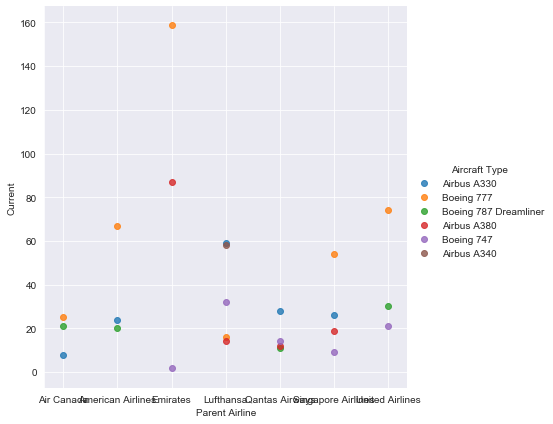

In [77]:
airplanes = airplanes.groupby(by=['Parent Airline', 'Aircraft Type']).sum()
airplanes = airplanes.reset_index()
sns.lmplot(x='Parent Airline', y='Current', hue='Aircraft Type', data=airplanes, fit_reg=False, size=6)

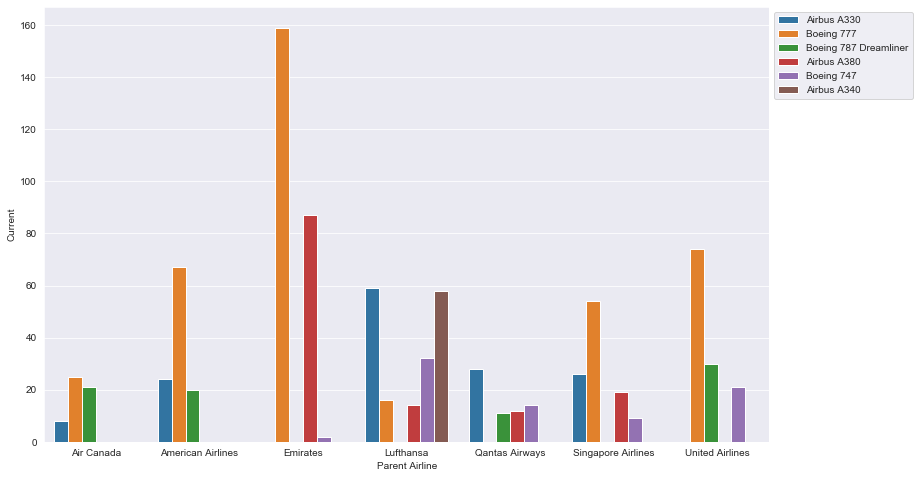

In [88]:
plt.figure(figsize=(13,8))
sns.barplot(data=airplanes, x='Parent Airline',y='Current', hue='Aircraft Type')
plt.legend(bbox_to_anchor=(1, 1.0))

In [100]:
#Among more recent planes, the A380 seems to be a commercial failure based on new orders' numbers, and the fact that Emirates is the only major airline investing in it. On the other hand, the 787 Dreamliner is a much better commercial success across multiple airlines.
#This being said the overall trend for the future is for the industry to lean more towards airbus planes (the percentage of new orders favor Airbus overall vs Boeing)
#Lion Air, IndiGo and AirAsia have a very high orders rate. They are clearly expanding at a very fast rate (see the ratio versus their current fleet). They also appear as clear outliers considering their current fleet size.
fleet_data.groupby(by= 'Airline').sum()['Orders'].sort_values(ascending= False).head(25)

Airline
Lion Air                   425.0
IndiGo                     420.0
AirAsia                    401.0
American Airlines          287.0
Southwest Airlines         284.0
Delta Airlines             268.0
China Eastern Airlines     233.0
Emirates                   231.0
Skywest                    225.0
RyanAir                    205.0
Etihad Airways             190.0
Qatar Airways              187.0
Turkish Airlines           179.0
Lufthansa                  176.0
Air China                  175.0
United Airlines            173.0
easyJet                    165.0
Avianca                    161.0
Aeroflot                   161.0
Wizz Air                   137.0
JetBlue Airways            136.0
Gol Linhas Aéreas          134.0
Korean Air                 133.0
Air Canada                 122.0
China Southern Airlines    115.0
Name: Orders, dtype: float64

In [151]:
#Implementing Linear Regression
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score as rs
%matplotlib inline

In [138]:
fleet_data_regression = pd.read_csv("Fleet Data_new.csv")

In [139]:
fleet_data_regression['Total Cost (Current)'].replace('', np.nan, inplace=True)
fleet_data_regression['Average Age'].replace('', np.nan, inplace=True)

In [140]:
fleet_data_regression.dropna(subset=['Total Cost (Current)'], inplace=True)
fleet_data_regression.dropna(subset=['Average Age'], inplace=True)

In [141]:
X = fleet_data_regression['Average Age'].values.reshape(-1,1)
y = fleet_data_regression['Total Cost (Current)'].values.reshape(-1,1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [143]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
print(regressor.intercept_)
print(regressor.coef_)

[3404.62508752]
[[-44.41920223]]


In [145]:
y_pred = regressor.predict(X_test)

In [146]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,919.0,2978.200746
1,358.0,3133.667954
2,1155.0,2982.642666
3,538.0,3093.690672
4,3724.0,3275.809401
...,...,...
157,66.0,2773.872416
158,3158.0,3071.481071
159,1920.0,2680.592091
160,5191.0,3284.693241


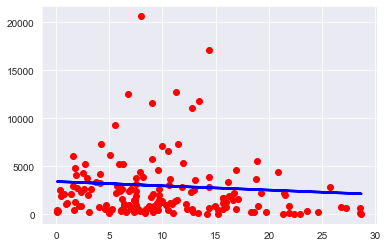

In [154]:
plt.scatter(X_test, y_test,  color='')
plt.plot(X_test, y_pred, color='blue', linewidth=2.5)
plt.show()

In [152]:
rs(df['Actual'], df['Predicted'])

-0.014540499366298976

In [ ]:
#Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points.
#As there is not enough data, it is not best fit.